In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
import nltk
import warnings
warnings.filterwarnings('ignore')

## 1. Loading the Data
Let's first have a look at the dataset and understand the size, attribute names etc.

In [2]:
# Dataset Path
dataset_path ="tweet.csv"

# Coloumns names
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]

# Data is endocoded by UTF-8
DATASET_ENCODING = "ISO-8859-1"

# Reading CSV
df = pd.read_csv(dataset_path, encoding =DATASET_ENCODING , names=DATASET_COLUMNS)

# Printing DataFrame
df

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [3]:
# Printing all coloums of Dataset
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [4]:
# Number of Unique value  
df["target"].value_counts()

4    800000
0    800000
Name: target, dtype: int64

In [5]:
# Number of Unique value
df['target'].value_counts(normalize=True)

4    0.5
0    0.5
Name: target, dtype: float64

In [6]:
# Dropping useless columns
df=df.drop(labels=["ids","date","flag","user"], axis=1)
df

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


## 2. Exploratory Data Analysis (EDA)

In [7]:
# Adding a column which contain length of text
df['length'] = df['text'].apply(len)
df

,target,text,length
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,is upset that he can't update his Facebook by ...,111
2,0,@Kenichan I dived many times for the ball. Man...,89
3,0,my whole body feels itchy and like its on fire,47
4,0,"@nationwideclass no, it's not behaving at all....",111
...,...,...,...
1599995,4,Just woke up. Having no school is the best fee...,56
1599996,4,TheWDB.com - Very cool to hear old Walt interv...,78
1599997,4,Are you ready for your MoJo Makeover? Ask me f...,57
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...,65


### Bar Plot and Pie Chart of Negative and Positive Tweets

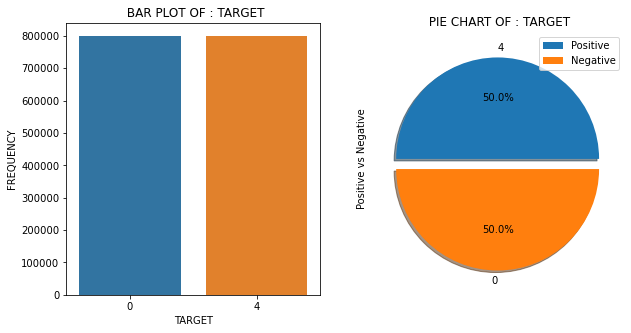

In [8]:
plt.figure(1,figsize=(10,5))

# Bar Plot
plt.subplot(1,2,1)
sns.countplot(x="target", data=df)
plt.xlabel("TARGET")
plt.ylabel("FREQUENCY")
plt.title(" BAR PLOT OF : TARGET")

# Pie chart
plt.subplot(1,2,2)
plt.title(" PIE CHART OF : TARGET")
df["target"].value_counts().plot(kind = 'pie', explode = [0, 0.1], autopct = '%1.1f%%', shadow = True)
plt.ylabel("Positive vs Negative")
plt.legend(["Positive", "Negative"])


plt.show()

### Histogram of 'Negative' and 'Positive' tweets with respect to Length 

<Figure size 720x360 with 0 Axes>

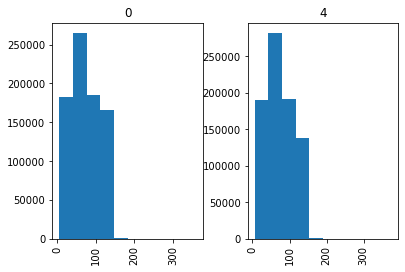

In [9]:
# Histrogram
plt.figure(1,figsize=(10,5))
df.hist(column='length',by='target')
plt.show()

## Wordcloud

### Wordcloud for Negative Tweets

In [10]:
# Seprating and reducing negative tweets
df_negative = df.loc[df['target']==0, :]
df_negative = df_negative.iloc[:5000]
df_negative.head()

,target,text,length
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,is upset that he can't update his Facebook by ...,111
2,0,@Kenichan I dived many times for the ball. Man...,89
3,0,my whole body feels itchy and like its on fire,47
4,0,"@nationwideclass no, it's not behaving at all....",111


In [11]:
# joning all tweets in one para
Negative_words = ' '.join(df_negative['text'])
Negative_words[:2000]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah! @Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds my whole body feels itchy and like its on fire  @nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.  @Kwesidei not the whole crew  Need a hug  @LOLTrish hey  long time no see! Yes.. Rains a bit ,only a bit  LOL , I'm fine thanks , how's you ? @Tatiana_K nope they didn't have it  @twittera que me muera ?  spring break in plain city... it's snowing  I just re-pierced my ears  @caregiving I couldn't bear to watch it.  And I thought the UA loss was embarrassing . . . . . @octolinz16 It it counts, idk why I did either. you never talk to me anymore  @smarrison i would've been the first, but i didn't have a gun.    not re

In [12]:
# Cleaning of Negative Tweets 
cleaned_N = " ".join([word for word in Negative_words.split()
                            if 'http' not in word 
                                and not word.startswith('@')
                                and word != 'RT'
                                and word!=STOPWORDS
                            ])
cleaned_N[:2000]

"- Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah! I dived many times for the ball. Managed to save 50% The rest go out of bounds my whole body feels itchy and like its on fire no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. not the whole crew Need a hug hey long time no see! Yes.. Rains a bit ,only a bit LOL , I'm fine thanks , how's you ? nope they didn't have it que me muera ? spring break in plain city... it's snowing I just re-pierced my ears I couldn't bear to watch it. And I thought the UA loss was embarrassing . . . . . It it counts, idk why I did either. you never talk to me anymore i would've been the first, but i didn't have a gun. not really though, zac snyder's just a doucheclown. I wish I got to watch it with you!! I miss you and how was the premiere?! Hollis' death scene will hurt me sever

In [13]:
# Reading image and convert it into array 
from PIL import Image
mk = np.array(Image.open("twitter.jpg"))

In [14]:
# Creating Wordcloud
wordcloud_Negative = WordCloud(
                      background_color='black',
                      width=1600,
                      height=800,
                      mask=mk
                     ).generate(cleaned_N)

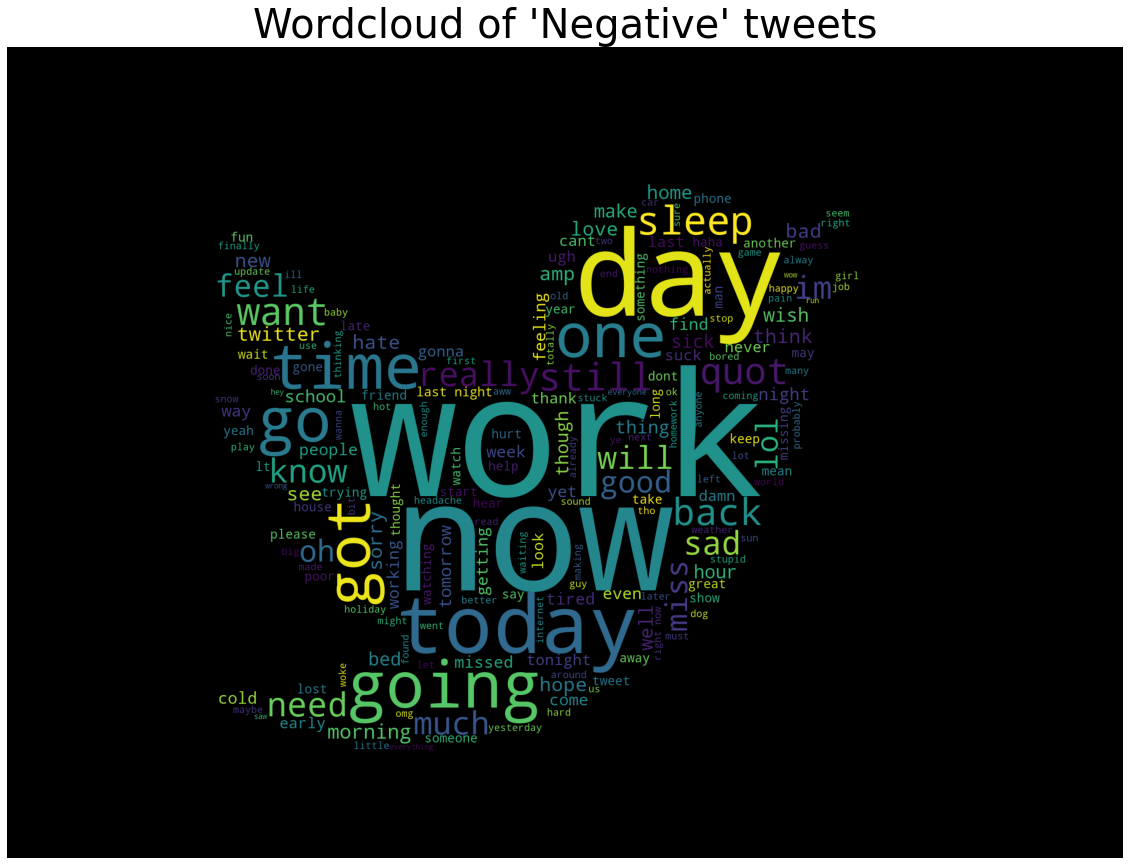

In [15]:
# Display Wordcloud
plt.figure(1,figsize=(20,30))
plt.title("Wordcloud of 'Negative' tweets",fontsize=40)
plt.imshow(wordcloud_Negative)
plt.axis('off')
plt.show()


### Wordcloud for Positive Tweets

In [16]:
# Seprating and reducing positive tweets
df_positive = df.loc[df['target']==4, :]
df_positive = df_positive.iloc[:5000]
df_positive.head()

,target,text,length
800000,4,I LOVE @Health4UandPets u guys r the best!!,44
800001,4,im meeting up with one of my besties tonight! ...,72
800002,4,"@DaRealSunisaKim Thanks for the Twitter add, S...",137
800003,4,Being sick can be really cheap when it hurts t...,104
800004,4,@LovesBrooklyn2 he has that effect on everyone,47


In [17]:
# joning all tweets in one para
Positive_words = ' '.join(df_positive['text'])
Positive_words[:2000]

"I LOVE @Health4UandPets u guys r the best!!  im meeting up with one of my besties tonight! Cant wait!!  - GIRL TALK!! @DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart.  Being sick can be really cheap when it hurts too much to eat real food  Plus, your friends make you soup @LovesBrooklyn2 he has that effect on everyone  @ProductOfFear You can tell him that I just burst out laughing really loud because of that  Thanks for making me come out of my sulk! @r_keith_hill Thans for your response. Ihad already find this answer  @KeepinUpWKris I am so jealous, hope you had a great time in vegas! how did you like the ACM's?! LOVE YOUR SHOW!!  @tommcfly ah, congrats mr fletcher for finally joining twitter  @e4VoIP I RESPONDED  Stupid cat is helping me type. Forgive errors  crazy day of school. there for 10 hours straiiight. about to watch the hills. @spencerpratt told me too! ha. happy birthday JB!  @naughtyha

In [18]:
# Cleaning of Negative Tweets
cleaned_P = " ".join([word for word in Positive_words.split()
                            if 'http' not in word 
                                and not word.startswith('@')
                                and word != 'RT'
                                and word!=STOPWORDS
                            ])
cleaned_P[:2000]

"I LOVE u guys r the best!! im meeting up with one of my besties tonight! Cant wait!! - GIRL TALK!! Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart. Being sick can be really cheap when it hurts too much to eat real food Plus, your friends make you soup he has that effect on everyone You can tell him that I just burst out laughing really loud because of that Thanks for making me come out of my sulk! Thans for your response. Ihad already find this answer I am so jealous, hope you had a great time in vegas! how did you like the ACM's?! LOVE YOUR SHOW!! ah, congrats mr fletcher for finally joining twitter I RESPONDED Stupid cat is helping me type. Forgive errors crazy day of school. there for 10 hours straiiight. about to watch the hills. told me too! ha. happy birthday JB! HOW DID I FORGET ABOUT TWO AND A HALF MEN?!?!? I LOVE THAT SHOW!!! Haha, don't worry! You'll get the hang of it! At least I won't be the only one fe

In [19]:
# Creating Wordcloud
wordcloud_Positive = WordCloud(
                      background_color='black',
                      width=1600,
                      height=800,
                      mask=mk
                     ).generate(cleaned_P)

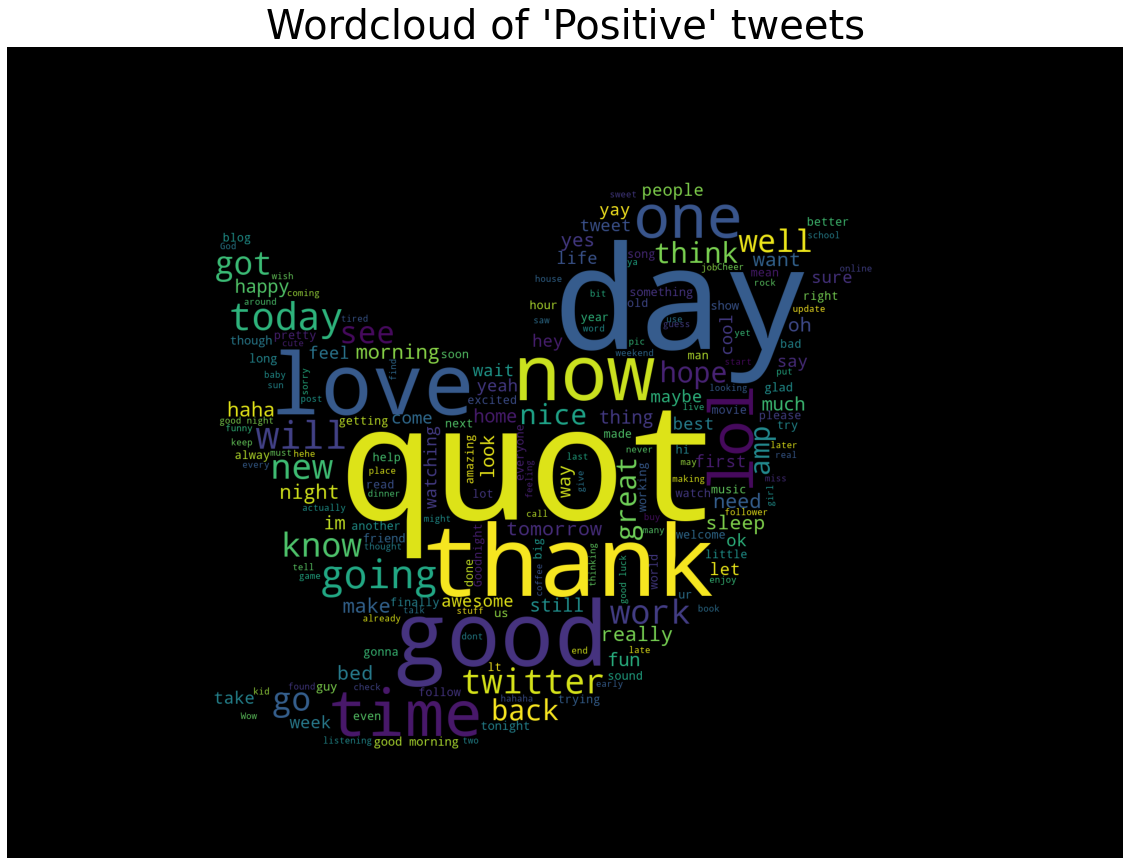

In [20]:
# Display Wordcloud
plt.figure(1,figsize=(20,30))
plt.title("Wordcloud of 'Positive' tweets",fontsize=40)
plt.imshow(wordcloud_Positive)
plt.axis('off')
plt.show()

## 3. Data Preprocessing
Our data exploration ends here. The next step will be preprocess the data in order to make the learning process more smooth.

Preprocessing steps:

* Removing special characters
* Convert sentence into lower case
* Remove Stop Words
* Stemming or Lemmatization

In [21]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm, tqdm_notebook
import re
tqdm.pandas()

In [22]:
# Reducing data
df=df_negative.append(df_positive)
df

,target,text,length
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,is upset that he can't update his Facebook by ...,111
2,0,@Kenichan I dived many times for the ball. Man...,89
3,0,my whole body feels itchy and like its on fire,47
4,0,"@nationwideclass no, it's not behaving at all....",111
...,...,...,...
804995,4,"@lbran, thanks for sending us the package - go...",66
804996,4,@ickleoriental hahahha.. U obviously don't hv ...,115
804997,4,"@juliekoh It's an internet term, but it's spil...",85
804998,4,new day.... NEW TRACK!!!!,26


In [23]:
df.to_csv('Retweet.csv')


In [24]:
# initialise the inbuilt Stemmer
stemmer = PorterStemmer()

In [25]:
# initializse the inbuilt Lemmatizer 
lemmatizer = WordNetLemmatizer()

In [26]:
# initializing the lists
clean_tweet_lst = []
tweet_len_lst = []

In [27]:
# Cleaning of data
def preprocess(raw_tweet, flag):
    # Removing special characters and digits
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet)
    
    # change sentence to lower case
    letters_only = letters_only.lower()

    # tokenize into words
    words = letters_only.split()
    
    # remove stop words                
    words = [w for w in words if not w in stopwords.words("english")]
    
    #Stemming/Lemmatization
    if(flag == 'stem'):
        words = [stemmer.stem(word) for word in words]
    else:
        words = [lemmatizer.lemmatize(word) for word in words]
    
    clean_tweet_lst.append(" ".join(words))
    
    tweet_len_lst.append(len(words))

### Stemming

In [28]:
clean_tweet_lst = []

tweet_len_lst = []

df['text'].progress_apply(lambda x: preprocess(x, 'stem'))

df['clean_tweet_stem'] = clean_tweet_lst

df['tweet_length_stem'] = tweet_len_lst

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [01:19<00:00, 126.39it/s]


In [29]:
df.head()

,target,text,length,clean_tweet_stem,tweet_length_stem
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,switchfoot http twitpic com zl awww bummer sho...,13
1,0,is upset that he can't update his Facebook by ...,111,upset updat facebook text might cri result sch...,11
2,0,@Kenichan I dived many times for the ball. Man...,89,kenichan dive mani time ball manag save rest g...,10
3,0,my whole body feels itchy and like its on fire,47,whole bodi feel itchi like fire,6
4,0,"@nationwideclass no, it's not behaving at all....",111,nationwideclass behav mad see,4


###  Lemmatization 

In [30]:
clean_tweet_lst = []

tweet_len_lst = []

df['text'].progress_apply(lambda x: preprocess(x, 'lemma'))

df['clean_tweet_lema'] = clean_tweet_lst

df['tweet_length_lema'] = tweet_len_lst

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [01:20<00:00, 124.51it/s]


In [31]:
df.head()

,target,text,length,clean_tweet_stem,tweet_length_stem,clean_tweet_lema,tweet_length_lema
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,switchfoot http twitpic com zl awww bummer sho...,13,switchfoot http twitpic com zl awww bummer sho...,13
1,0,is upset that he can't update his Facebook by ...,111,upset updat facebook text might cri result sch...,11,upset update facebook texting might cry result...,11
2,0,@Kenichan I dived many times for the ball. Man...,89,kenichan dive mani time ball manag save rest g...,10,kenichan dived many time ball managed save res...,10
3,0,my whole body feels itchy and like its on fire,47,whole bodi feel itchi like fire,6,whole body feel itchy like fire,6
4,0,"@nationwideclass no, it's not behaving at all....",111,nationwideclass behav mad see,4,nationwideclass behaving mad see,4


## 4. Data Preparation
Let's now prepare the data and build the model.

In [32]:
# splitting into test and train

from sklearn.model_selection  import train_test_split
train, test = train_test_split(df,test_size=0.2,random_state=42)

In [33]:
train_clean_tweet=[]
for tweet in train['clean_tweet_stem']:
    train_clean_tweet.append(tweet)

test_clean_tweet=[]
for tweet in test['clean_tweet_stem']:
    test_clean_tweet.append(tweet)

### Text to numerical vector using Bag of Word

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1,2))

train_features = vectorizer.fit_transform(train_clean_tweet)

test_features = vectorizer.transform(test_clean_tweet)

In [35]:
vectorizer.vocabulary_

{'almahh': 1046,
 'hahaha': 20524,
 'yeah': 57300,
 'ozzi': 36466,
 'said': 42161,
 'almahh hahaha': 1047,
 'hahaha yeah': 20549,
 'yeah ozzi': 57351,
 'ozzi said': 36467,
 'cant': 6891,
 'sleep': 44715,
 'cant sleep': 6925,
 'realiz': 40337,
 'twitter': 52123,
 'get': 17868,
 'attent': 2798,
 'mama': 30051,
 'lame': 26602,
 'realiz twitter': 40351,
 'twitter get': 52178,
 'get attent': 17883,
 'attent mama': 2802,
 'mama hahaha': 30052,
 'hahaha lame': 20534,
 'mydesir': 33250,
 'saw': 42441,
 'earlier': 13271,
 'darker': 10801,
 'sight': 44279,
 'sound': 45812,
 'subscrib': 47327,
 'blog': 5139,
 'googl': 19378,
 'reader': 40248,
 'yummmminesssssss': 57737,
 'mydesir saw': 33251,
 'saw earlier': 42447,
 'earlier darker': 13273,
 'darker sight': 10803,
 'sight sound': 44282,
 'sound subscrib': 45847,
 'subscrib blog': 47328,
 'blog googl': 5151,
 'googl reader': 19389,
 'reader yummmminesssssss': 40250,
 'wait': 53876,
 'pizza': 37791,
 'bake': 3685,
 'wait pizza': 53944,
 'pizza bake

In [36]:
print("Total unique words:", len(vectorizer.vocabulary_))

print("Type of train_features:", type(train_features))

print("Shape of input data", train_features.shape)


Total unique words: 57890
Type of train_features: <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data (8000, 57890)


## 5. Model Building and Evaluation

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [38]:
Classifiers = [LogisticRegression()]

In [39]:
dense_features = train_features.toarray()

dense_test = test_features.toarray()

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

LogisticRegression
Accuracy of LogisticRegression is 0.727
[[717 251]
 [295 737]]


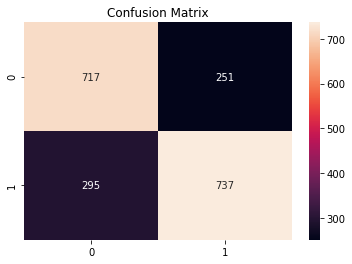

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [01:05<00:00, 65.00s/it]

              precision    recall  f1-score   support

           0       0.71      0.74      0.72       968
           4       0.75      0.71      0.73      1032

    accuracy                           0.73      2000
   macro avg       0.73      0.73      0.73      2000
weighted avg       0.73      0.73      0.73      2000



In [40]:
for classifier in tqdm(Classifiers):
    fit = classifier.fit(dense_features,train['target'])
    pred = fit.predict(dense_test)
    accuracy = metrics.accuracy_score(pred,test['target'])
    print(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))
    con_metric=metrics.confusion_matrix(pred,test['target'])
    print(con_metric)
    sns.heatmap(con_metric, annot=True, fmt='d')
    plt.title("Confusion Matrix")
    plt.show()
    print(metrics.classification_report(pred,test['target']))

In [41]:
con_metric = metrics.confusion_matrix(pred,test['target'])
con_metric

array([[717, 251],
       [295, 737]], dtype=int64)

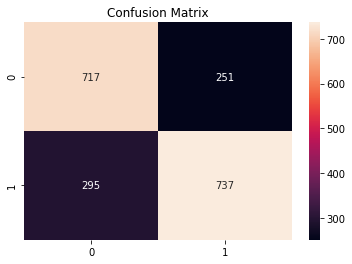

In [42]:
sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [43]:
print(metrics.classification_report(pred,test['target']))

              precision    recall  f1-score   support

           0       0.71      0.74      0.72       968
           4       0.75      0.71      0.73      1032

    accuracy                           0.73      2000
   macro avg       0.73      0.73      0.73      2000
weighted avg       0.73      0.73      0.73      2000



### Saving the Model and Vectorizer in Pickle

In [44]:
dense_features = train_features.toarray()

model = LogisticRegression()

model.fit(dense_features,train['target'])

LogisticRegression()

In [45]:
from pickle import dump
dump(vectorizer, open('countvectorizer.pkl', 'wb'))
dump(model, open('logit_model.pkl', 'wb'))

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from pickle import load
from googletrans import Translator

In [47]:
def preprocess(raw_tweet):
    # Removing special characters and digits
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet)
    
    # change sentence to lower case
    letters_only = letters_only.lower()

    # tokenize into words
    words = letters_only.split()
    
    # remove stop words                
    words = [w for w in words if not w in stopwords.words("english")]
    
    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    
    clean_sent = " ".join(words)
    
    return clean_sent

In [48]:
def predict(tweet):
    
    # Loading pretrained CountVectorizer from pickle file
    vectorizer = load(open('countvectorizer.pkl', 'rb'))
    
    # Loading pretrained logistic classifier from pickle file
    classifier = load(open('logit_model.pkl', 'rb'))
    
    # Preprocessing the tweet
    clean_tweet = preprocess(tweet)
    
    # Converting text to numerical vector
    clean_tweet_encoded = vectorizer.transform([clean_tweet])
    
    # Converting sparse matrix to dense matrix
    tweet_input = clean_tweet_encoded.toarray()
    
    # Prediction
    prediction = classifier.predict(tweet_input)
    pred_prob = classifier.predict_proba(tweet_input)

          
    if(prediction == 0):
        print("Negative Sentiment",round(float(pred_prob[0][0])*100))
    else:
        print("Positive Sentiment",round(float(pred_prob[0][1])*100))


In [49]:
def label(tweet):
    translator = Translator()
    regex = re.compile('[@_!#$%^&*()<>?/\|}{~:]') 
    english=0
    hindi=0
    c="+ univ"
    if(regex.search(tweet) == None):
        c=""
    l=tweet.split();

    for i in l:
        t=(translator.translate(i))
        if str(t.src)=='en':
            english=1
        elif t.src=='hi':
            hindi=1
        else:
            english=1

    if english==1 and hindi==1:
        c="Mixed"+c
    elif english==0 and hindi==1:
        c="Hindi"+c
    elif english==1 and hindi==0:
        c="English"+c

    print(c)

In [50]:
def convert(tweet):
    translator = Translator()
    t=(translator.translate(tweet))
    return t.text

In [ ]:
tweet = input("Enter a tweet to check its sentiment: ")
label(tweet)
new_tweet=convert(tweet)
predict(new_tweet)